In [21]:
import time
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

## Load encodings csv

In [22]:
filepath = './data/encodings.csv'
df = pd.read_csv(filepath, header=0)
print(df.shape)
df.head()

(66, 769)


,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat759,feat760,feat761,feat762,feat763,feat764,feat765,feat766,feat767,text
0,0.104803,-0.114247,0.157800,-0.049896,0.115481,0.093834,0.056485,-0.222560,0.001640,-0.080373,...,0.107883,0.276540,0.019315,-0.225401,-0.243495,-0.176425,-0.407703,0.035008,-0.236417,address
1,0.067908,0.084772,0.030226,0.199026,-0.098567,-0.159643,-0.156463,0.019552,-0.034408,-0.015863,...,-0.157741,-0.013833,0.096043,0.110286,0.122939,-0.001336,0.161704,0.066357,0.033900,life
2,0.174978,-0.117611,0.455107,-0.103192,0.117753,-0.260042,0.225693,-0.110158,-0.127926,-0.059156,...,-0.130747,-0.059017,-0.330325,0.006262,-0.233259,-0.507665,0.192613,-0.197245,-0.205652,enter
3,0.041591,0.099528,0.297063,0.191934,0.348143,-0.453566,0.183410,0.477807,-0.233496,0.449008,...,0.028028,-0.193187,-0.465714,-0.153595,-0.025650,-0.340736,0.513492,-0.437414,0.516119,ctsmantms
4,-0.031152,-0.249801,0.421323,0.103318,0.380519,-0.456594,0.104306,0.169635,-0.212280,0.446845,...,0.065929,-0.142774,-0.352823,-0.092453,-0.066042,-0.303166,0.421782,-0.594905,0.414206,ctsmanager


# PCA

In [23]:
data = df.loc[:, df.columns != 'text'].values

pca = PCA(n_components=3, random_state = 42)
pca_result = pca.fit_transform(data)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.34594369 0.04721752 0.03918133]


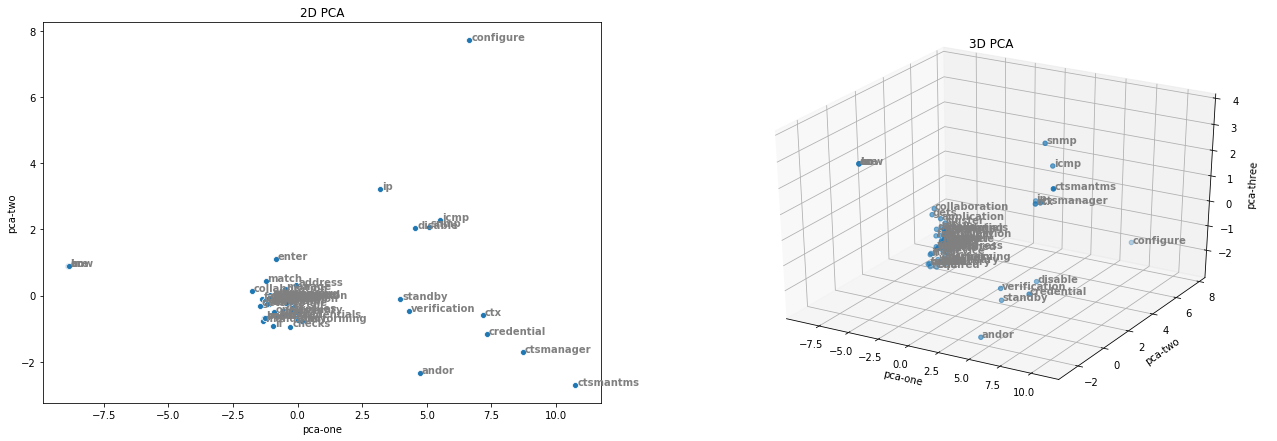

In [24]:
fig = plt.figure(figsize=(22,7))

# PCA in 2D
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(
    x = df['pca-one'], 
    y = df['pca-two'])
ax1.set_title("2D PCA")

# PCA in 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"],
    cmap='tab10')
ax2.set_title("3D PCA")
ax2.set_xlabel('pca-one')
ax2.set_ylabel('pca-two')
ax2.set_zlabel('pca-three')

# Annotate points with labels
for line in df.index:
    ax1.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax2.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"pca-three"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')

fig.show()

# t-SNE

In [25]:
data = df.loc[:, df.columns != 'text'].values
tsne = TSNE(n_components=3, perplexity=5, n_iter=1500, learning_rate = 1000, random_state = 42, verbose=1)
tsne_results = tsne.fit_transform(data)

df['tsne-one'] = tsne_results[:,0]
df['tsne-two'] = tsne_results[:,1]
df['tsne-three'] = tsne_results[:,2]

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 66 samples in 0.001s...
[t-SNE] Computed neighbors for 66 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 66 / 66
[t-SNE] Mean sigma: 1.405357
[t-SNE] KL divergence after 250 iterations with early exaggeration: 128.313248
[t-SNE] KL divergence after 1500 iterations: 3.734885


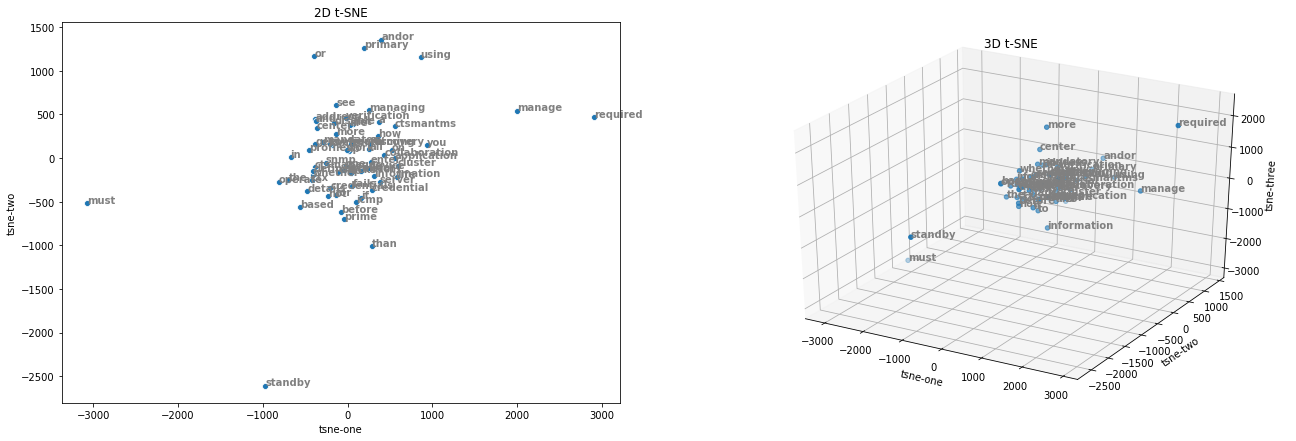

In [26]:
fig = plt.figure(figsize=(22,7))

# t-SNE in 2D
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(
    x = df['tsne-one'], 
    y = df['tsne-two'])
ax1.set_title("2D t-SNE")

# t-SNE in 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(
    xs=df["tsne-one"], 
    ys=df["tsne-two"], 
    zs=df["tsne-three"],
    cmap='tab10')
ax2.set_title("3D t-SNE")
ax2.set_xlabel('tsne-one')
ax2.set_ylabel('tsne-two')
ax2.set_zlabel('tsne-three')

# Annotate points with labels
for line in df.index:
    ax1.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax2.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"tsne-three"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')

fig.show()

# Comparisons between PCA and t-SNE

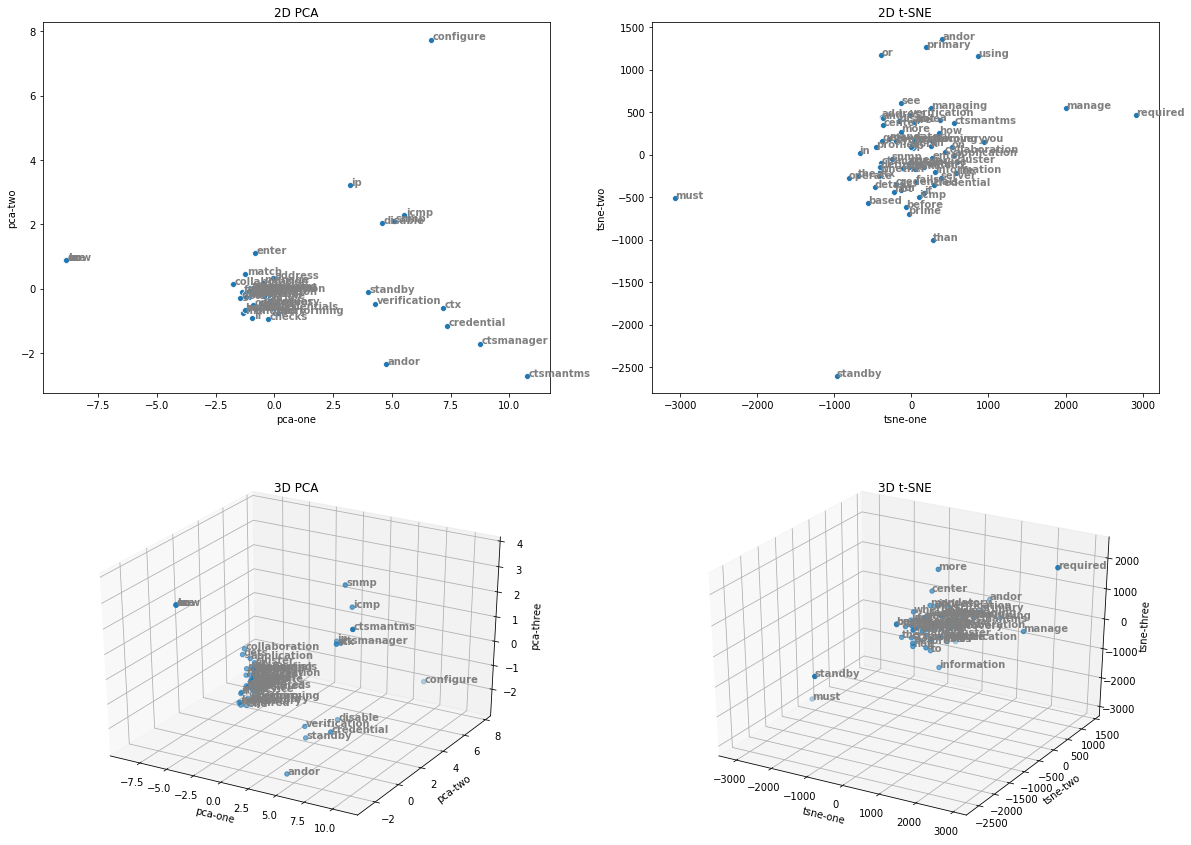

In [27]:
fig = plt.figure(figsize=(20,15))

# PCA in 2D
ax1 = fig.add_subplot(2, 2, 1)
sns.scatterplot(
    x = df['pca-one'], 
    y = df['pca-two'])
ax1.set_title("2D PCA")

# t-SNE in 2D
ax2 = fig.add_subplot(2, 2, 2)
sns.scatterplot(
    x = df['tsne-one'], 
    y = df['tsne-two'])
ax2.set_title("2D t-SNE")


# PCA in 3D
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"],
    cmap='tab10')
ax3.set_title("3D PCA")
ax3.set_xlabel('pca-one')
ax3.set_ylabel('pca-two')
ax3.set_zlabel('pca-three')

# t-SNE in 3D
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(
    xs=df["tsne-one"], 
    ys=df["tsne-two"], 
    zs=df["tsne-three"],
    cmap='tab10')
ax4.set_title("3D t-SNE")
ax4.set_xlabel('tsne-one')
ax4.set_ylabel('tsne-two')
ax4.set_zlabel('tsne-three')

# Annotate points with labels
for line in df.index:
    ax1.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax2.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax3.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"pca-three"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax4.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"tsne-three"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')

fig.show()

# Combining PCA and t-SNE

In [30]:
data = df.loc[:, df.columns != 'text'].values

# Use PCA to reduce dimensions to a number that's manageable for t-SNE
pca_50 = PCA(n_components=50, random_state = 6)
pca_result_50 = pca_50.fit_transform(data)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))


# Reduce dimensionality to 2 with t-SNE.
# Perplexity is roughly the number of close neighbors you expect a point to have. Our data is sparse, so we chose a small value, 10.
# The KL divergence objective is non-convex, so the result is different depending on the seed used.
tsne = TSNE(n_components=2, perplexity=5, n_iter=1500, learning_rate = 1000, random_state = 7, verbose=1)
tsne_pca_results = tsne.fit_transform(pca_result_50)

# Add results to dataframe
df['tsne-pca50-one'] = tsne_pca_results[:,0]
df['tsne-pca50-two'] = tsne_pca_results[:,1]

Cumulative explained variation for 50 principal components: 0.9999998942557394
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 66 samples in 0.000s...
[t-SNE] Computed neighbors for 66 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 66 / 66
[t-SNE] Mean sigma: 756.788651
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.827522
[t-SNE] KL divergence after 1500 iterations: 1.214657


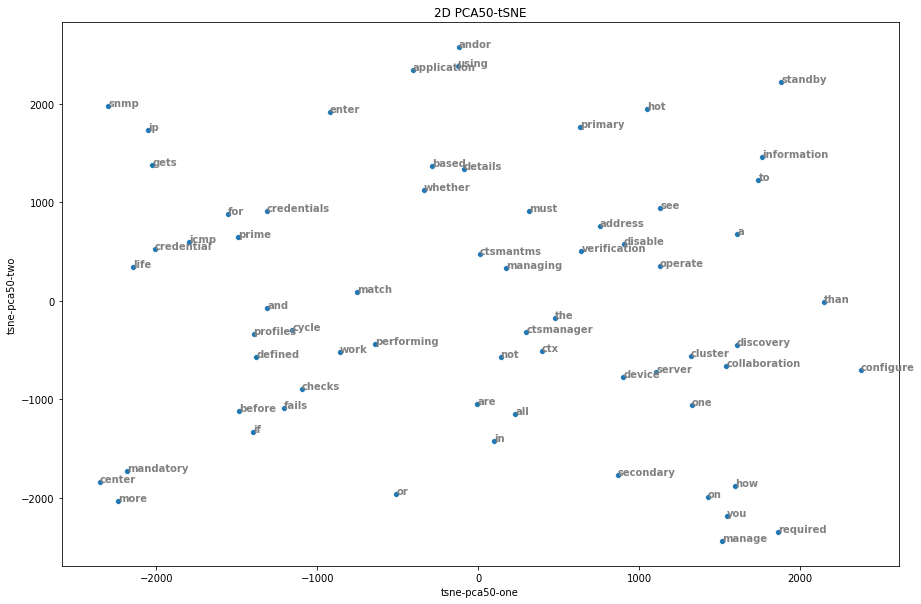

In [31]:
fig = plt.figure(figsize=(15,10))
ax1 = sns.scatterplot(
    x = df['tsne-pca50-one'], 
    y = df['tsne-pca50-two'])
ax1.set_title("2D PCA50-tSNE")

# Annotate points with labels
for line in df.index:
    ax1.text(df.loc[line,"tsne-pca50-one"]+0.07, 
             df.loc[line,"tsne-pca50-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray',
             weight='semibold')

# Compare the three methods

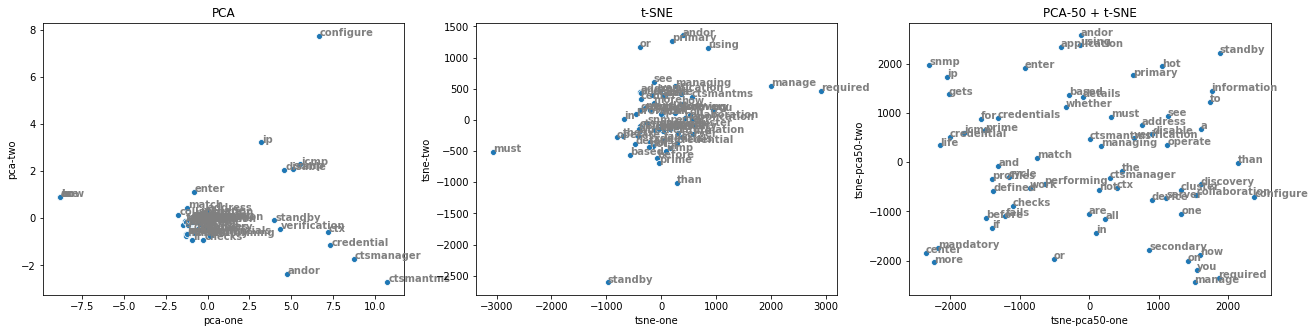

In [32]:
fig = plt.figure(figsize=(22,5))

# PCA in 2D
ax1 = fig.add_subplot(1, 3, 1)
sns.scatterplot(
    x = df['pca-one'], 
    y = df['pca-two'])
ax1.set_title("PCA")

# t-SNE in 2D
ax2 = fig.add_subplot(1, 3, 2)
sns.scatterplot(
    x = df['tsne-one'], 
    y = df['tsne-two'])
ax2.set_title("t-SNE")

# PCA-50 + t-SNE in 2D
ax3 = fig.add_subplot(1, 3, 3)
ax3 = sns.scatterplot(
    x = df['tsne-pca50-one'], 
    y = df['tsne-pca50-two'])
ax3.set_title("PCA-50 + t-SNE")


# Annotate points with labels
for line in df.index:
    ax1.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax2.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax3.text(df.loc[line,"tsne-pca50-one"]+0.07, 
             df.loc[line,"tsne-pca50-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')

fig.show()